# 1. transfer SOCAT data from MATLAB to python

----------

The SOCAT dataset defines the North Pacific to end at 30 degrees latitude. It also splits the world at 180 degrees longitude, which is right in the middle of the Pacific. This gives us four sections of the North Pacific, which we need to download separately from MATLAB and combine in Python.  

This script shows the bounds I used to download each of the four sections of the North Pacific and how to graph them on one plot. 

----------

Sydney Paige Kim 

Date Created: 07/15/2021

Last Edited: 08/20/2021

## lat/lon bounds for MATLAB 

In [1]:
"""
MATLAB is going to prompt you to input minimum and maximum latiutde and longitude
values when you try to download the SOCAT data. These are the numbers I used.

North Pacific - Asia
    Min. Long: 100
    Max. Long: 180
    Min. Lat: 10
    Max. Lat: 70
    
North Pacific - Americas
    Min. Long: 180
    Max. Long: 260
    Min. Lat: 10
    Max. Lat: 70

Tropical Pacific - Asia
    Min. Long: 100
    Max. Long: 180
    Min. Lat: 10
    Max. Lat: 30
   
Tropical Pacific - Americas
    Min. Long: 180
    Max. Long: 260
    Min. Lat: 10
    Max. Lat: 30
    
"""

'\n  \nNorth Pacific - Asia\n    Min. Long: 100\n    Max. Long: 180\n    Min. Lat: 10\n    Max. Lat: 70\n    \nNorth Pacific - Americas\n    Min. Long: 180\n    Max. Long: 260\n    Min. Lat: 10\n    Max. Lat: 70\n\nTropical Pacific - Asia\n    Min. Long: 100\n    Max. Long: 180\n    Min. Lat: 10\n    Max. Lat: 30\n   \nTropical Pacific - Americas\n    Min. Long: 180\n    Max. Long: 260\n    Min. Lat: 10\n    Max. Lat: 30\n    \n'

In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# I used pandas just to visualize the format of the data before trying to work with it

df = pd.read_csv("SOCAT_data_North_Asia_Pacific_nohours.csv", engine = 'python')
df.head(3)    

,Year,Month,Day,Lat,Lon,fCO2rec
0,2007,2,19,37.92,146.55,331.884
1,2007,2,19,37.92,146.55,332.650
2,2007,2,19,37.92,146.55,333.147


In [4]:
df = pd.read_csv("SOCAT_data_North_America_Pacific_nohours.csv", engine = 'python')
df.head(3)    

,Year,Month,Day,Lat,Lon,fCO2rec
0,1985,1,22,30.21,210.95000,321.7
1,1985,1,22,30.29,211.10001,324.2
2,1985,1,22,30.42,211.25000,322.2


In [5]:
df = pd.read_csv("SOCAT_data_Tropical_Asia_Pacific_nohours.csv", engine = 'python')
df.head(3)    

,Year,Month,Day,Lat,Lon,fCO2rec
0,1996,10,10,13.02,144.36000,357.747
1,1996,10,10,13.02,144.36000,356.173
2,1996,10,10,13.01,144.35001,355.863


In [6]:
df = pd.read_csv("SOCAT_data_Tropical_America_Pacific_nohours.csv", engine = 'python')
df.head(3)    

,Year,Month,Day,Lat,Lon,fCO2rec
0,1984,7,12,24.07,225.88001,330.0
1,1984,7,13,23.92,225.67000,324.2
2,1984,7,13,23.84,225.55000,321.8


In [7]:
# this turns the .csv files from MATLAB into numpy arrays, which are easier to work with

np_SOCAT_North_Asia = np.genfromtxt("SOCAT_data_North_Asia_Pacific_nohours.csv",delimiter=',')
np_SOCAT_North_America = np.genfromtxt("SOCAT_data_North_America_Pacific_nohours.csv",delimiter=',')
np_SOCAT_Tropical_Asia = np.genfromtxt("SOCAT_data_Tropical_Asia_Pacific_nohours.csv",delimiter=',')
np_SOCAT_Tropical_America = np.genfromtxt("SOCAT_data_Tropical_America_Pacific_nohours.csv",delimiter=',')

In [8]:
# making sure the arrays have the same number of columns before combining them

print(np.shape(np_SOCAT_Tropical_America))
print(np.shape(np_SOCAT_Tropical_Asia))
print(np.shape(np_SOCAT_North_America))
print(np.shape(np_SOCAT_North_Asia))

(531913, 6)
(337732, 6)
(372281, 6)
(464688, 6)


In [9]:
np.shape(np.argwhere(np_SOCAT_Tropical_America[:,0]==2010.))

(27816, 1)

In [10]:
# combining the four sections of the North Pacific into one large array

np_SOCAT_unfiltered = np.concatenate((np_SOCAT_North_Asia,np_SOCAT_North_America[1:],np_SOCAT_Tropical_Asia[1:],np_SOCAT_Tropical_America[1:]),axis=0)

In [11]:
print(np.shape(np_SOCAT_unfiltered))

(1706611, 6)


In [12]:
# now I'm removing data so I can work with measurements taken from 2000 through 2019

years_to_remove = np.arange(1962.,2000.)
print(years_to_remove)

np_SOCAT = np.copy(np_SOCAT_unfiltered)  

[1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 1999.]


In [13]:
years_to_remove = np.append(years_to_remove, [2020.], axis=0)
print(years_to_remove)

[1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 1999. 2020.]


In [14]:
for yr in years_to_remove:
    rows_to_remove = np.argwhere(np_SOCAT[:,0]==yr)
    np_SOCAT = np.delete(np_SOCAT,rows_to_remove,axis=0)

In [15]:
print(np.shape(np_SOCAT_unfiltered))
print(np.shape(np_SOCAT))

(1706611, 6)
(1466062, 6)


In [16]:
# this returns an empty array, so we know it worked!

np.argwhere(np_SOCAT[:,0]==1999.)

array([], shape=(0, 1), dtype=int64)

In [17]:
# here, I am defining variables by column in the new SOCAT array

year = np_SOCAT[1:,0]
month = np_SOCAT[1:,1]
day = np_SOCAT[1:,2]
lat = np_SOCAT[1:,3]
lon = np_SOCAT[1:,4]
fco2 = np_SOCAT[1:,5]

## now, we graph it to make sure it looks correct

In [18]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]   

In [19]:
plt.rcParams["figure.figsize"] = (20,10)  #(width, height)

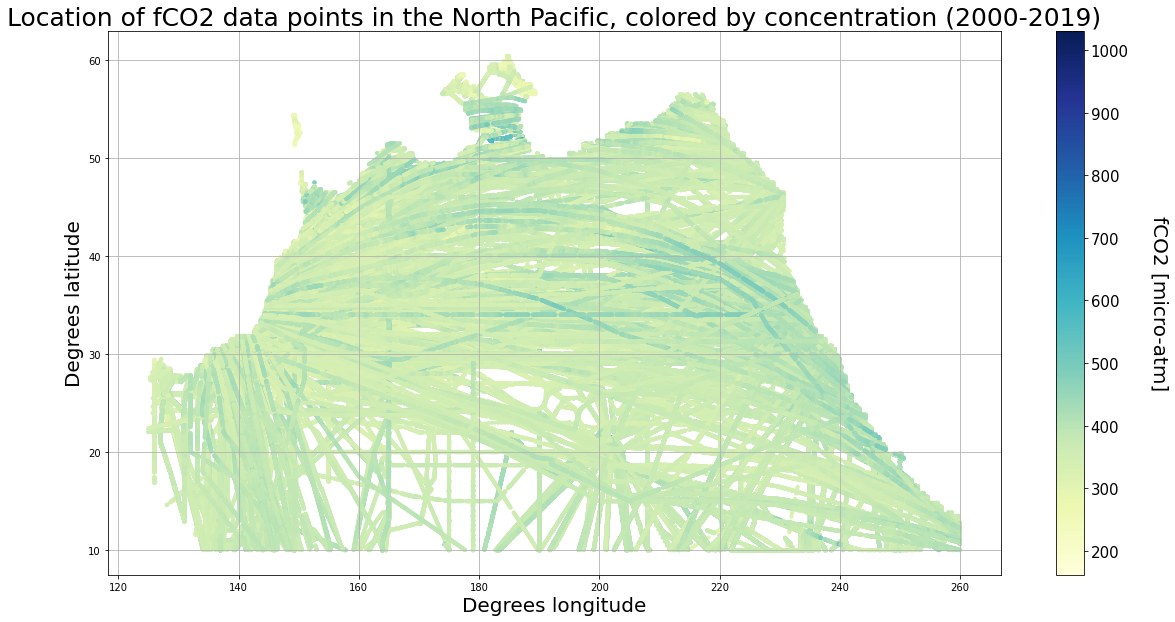

In [20]:
fig = plt.scatter(lon,lat,c=fco2,s=10,cmap='YlGnBu')

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)  
plt.xlabel('Degrees longitude', fontsize = 20)
plt.ylabel('Degrees latitude', fontsize = 20)
plt.title('Location of fCO2 data points in the North Pacific, colored by concentration (2000-2019)', size=25)
plt.grid()

cbar = plt.colorbar()
cbar.set_label('fCO2 [micro-atm]', rotation=270, fontsize=20, labelpad=40)
cbar.ax.tick_params(labelsize=15)   